# EDA Ramada by Wyndham Reno Hotel _ Casino - Nevada

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import calendar
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import string
import re

In [2]:
df_reno = pd.read_excel('.\Ramada by Wyndham Reno Hotel _ Casino - Nevada.xlsx')

In [3]:
df_reno.head()

,place_id,name,google_id,location_link,reviews_link,reviews_per_score,reviews,rating,review_id,author_title,author_id,review_text,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_rating,review_timestamp,review_datetime_utc,reviews_id
0,ChIJY5H7s6SZ7ocRo0_nWCZdZj0,Ramada by Wyndham Reno Hotel & Casino,0x87ee99a4b3fb9163:0x3d665d2658e74fa3,https://www.google.com/maps/place/Ramada+by+Wy...,https://search.google.com/local/reviews?placei...,"{""1"": 470, ""2"": 312, ""3"": 415, ""4"": 343, ""5"": ...",2020,3,ChdDSUhNMG9nS0VJQ0FnSUNwcktLZWl3RRAB,MIC Blue,104684602744617738159,I stayed at this property in July of 2019. Wow...,"Dear MIC Blue,\nWe appreciate you taking the t...",1.690724e+09,07/30/2023 13:36:40,5.0,1690701325,07/30/2023 07:15:25,4424326103219785635
1,ChIJY5H7s6SZ7ocRo0_nWCZdZj0,Ramada by Wyndham Reno Hotel & Casino,0x87ee99a4b3fb9163:0x3d665d2658e74fa3,https://www.google.com/maps/place/Ramada+by+Wy...,https://search.google.com/local/reviews?placei...,"{""1"": 470, ""2"": 312, ""3"": 415, ""4"": 343, ""5"": ...",2020,3,ChZDSUhNMG9nS0VJQ0FnSUNwMHVmOEJ3EAE,Michael Lee,110172413466251430216,Fantastic for our state conference with a few ...,"Dear Michael Lee,\nWe are thrilled to hear tha...",1.690910e+09,08/01/2023 17:11:30,5.0,1690850557,08/01/2023 00:42:37,4424326103219785635
2,ChIJY5H7s6SZ7ocRo0_nWCZdZj0,Ramada by Wyndham Reno Hotel & Casino,0x87ee99a4b3fb9163:0x3d665d2658e74fa3,https://www.google.com/maps/place/Ramada+by+Wy...,https://search.google.com/local/reviews?placei...,"{""1"": 470, ""2"": 312, ""3"": 415, ""4"": 343, ""5"": ...",2020,3,ChdDSUhNMG9nS0VJQ0FnSUNwMGNMNDV3RRAB,Deb Sample,110632351800415134199,"Loud. Loud traffic, loud music, train noise al...","Dear Deb Sample,\nI'm so sorry to hear we let ...",1.691260e+09,08/05/2023 18:22:20,2.0,1691247150,08/05/2023 14:52:30,4424326103219785635
3,ChIJY5H7s6SZ7ocRo0_nWCZdZj0,Ramada by Wyndham Reno Hotel & Casino,0x87ee99a4b3fb9163:0x3d665d2658e74fa3,https://www.google.com/maps/place/Ramada+by+Wy...,https://search.google.com/local/reviews?placei...,"{""1"": 470, ""2"": 312, ""3"": 415, ""4"": 343, ""5"": ...",2020,3,ChdDSUhNMG9nS0VJQ0FnSUNwcFA3MGdRRRAB,Nancy Harrington,103320906000192760283,The room smelled like vomit and didn't appear ...,"Dear Nancy Harrington,\nThank you for choosing...",1.690634e+09,07/29/2023 12:36:38,1.0,1690590458,07/29/2023 00:27:38,4424326103219785635
4,ChIJY5H7s6SZ7ocRo0_nWCZdZj0,Ramada by Wyndham Reno Hotel & Casino,0x87ee99a4b3fb9163:0x3d665d2658e74fa3,https://www.google.com/maps/place/Ramada+by+Wy...,https://search.google.com/local/reviews?placei...,"{""1"": 470, ""2"": 312, ""3"": 415, ""4"": 343, ""5"": ...",2020,3,ChZDSUhNMG9nS0VJQ0FnSUNwbUtDOFl3EAE,Brenden Benjamin,110072613001534894250,Can't give five stars because the hotel itself...,"Dear Brenden Benjamin,\nThank you for taking t...",1.690567e+09,07/28/2023 17:50:29,4.0,1690508194,07/28/2023 01:36:34,4424326103219785635


In [4]:
df_reno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   place_id                             1000 non-null   object 
 1   name                                 1000 non-null   object 
 2   google_id                            1000 non-null   object 
 3   location_link                        1000 non-null   object 
 4   reviews_link                         1000 non-null   object 
 5   reviews_per_score                    1000 non-null   object 
 6   reviews                              1000 non-null   int64  
 7   rating                               1000 non-null   int64  
 8   review_id                            1000 non-null   object 
 9   author_title                         1000 non-null   object 
 10  author_id                            921 non-null    object 
 11  review_text                    

## Pre-procesando los reviews para realizar WordCloud y análisis de sentimiento

In [5]:
# Lower casing and str type
df = df_reno.copy()

df['review_text'] = df["review_text"].astype(str)
df['review_text']= df["review_text"].apply(lambda x: x.lower())

In [6]:
# Checkeamos si hay algun caracter especial
alphabet = string.ascii_letters+string.punctuation
print(df.review_text.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
    expe = re.compile("[\U00010000-\U0010ffff]", flags=re.UNICODE)
    #return expe.findall(s)
    return expe.sub(r"",s)

for y in df["review_text"]:
    extracted_emojis.append(str(extract_emojis(y)))

True


In [7]:
# stop words

stop_words=stopwords.words('english')
df['extracted_emojis'] = extracted_emojis
df['extracted_emojis']= df['extracted_emojis'].apply(lambda x:x if x not in stop_words else None)

In [8]:
# stemming

def stemming(x):
    st = PorterStemmer()
    if x is not None:
       for word in x.split():
           st.stem(word)

df['extracted_emojis'].apply(lambda x:stemming(x))

0      None
1      None
2      None
3      None
4      None
       ... 
995    None
996    None
997    None
998    None
999    None
Name: extracted_emojis, Length: 1000, dtype: object

In [9]:
# Puntaje de sentimiento de la columna 'extracted_emojis'

def senti_sc(x):
    if x is not None:
       return TextBlob(x).polarity

df["sentiment_score"]= df["extracted_emojis"].apply(senti_sc)


df.head()

,place_id,name,google_id,location_link,reviews_link,reviews_per_score,reviews,rating,review_id,author_title,...,review_text,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_rating,review_timestamp,review_datetime_utc,reviews_id,extracted_emojis,sentiment_score
0,ChIJY5H7s6SZ7ocRo0_nWCZdZj0,Ramada by Wyndham Reno Hotel & Casino,0x87ee99a4b3fb9163:0x3d665d2658e74fa3,https://www.google.com/maps/place/Ramada+by+Wy...,https://search.google.com/local/reviews?placei...,"{""1"": 470, ""2"": 312, ""3"": 415, ""4"": 343, ""5"": ...",2020,3,ChdDSUhNMG9nS0VJQ0FnSUNwcktLZWl3RRAB,MIC Blue,...,i stayed at this property in july of 2019. wow...,"Dear MIC Blue,\nWe appreciate you taking the t...",1.690724e+09,07/30/2023 13:36:40,5.0,1690701325,07/30/2023 07:15:25,4424326103219785635,i stayed at this property in july of 2019. wow...,0.232041
1,ChIJY5H7s6SZ7ocRo0_nWCZdZj0,Ramada by Wyndham Reno Hotel & Casino,0x87ee99a4b3fb9163:0x3d665d2658e74fa3,https://www.google.com/maps/place/Ramada+by+Wy...,https://search.google.com/local/reviews?placei...,"{""1"": 470, ""2"": 312, ""3"": 415, ""4"": 343, ""5"": ...",2020,3,ChZDSUhNMG9nS0VJQ0FnSUNwMHVmOEJ3EAE,Michael Lee,...,fantastic for our state conference with a few ...,"Dear Michael Lee,\nWe are thrilled to hear tha...",1.690910e+09,08/01/2023 17:11:30,5.0,1690850557,08/01/2023 00:42:37,4424326103219785635,fantastic for our state conference with a few ...,0.210979
2,ChIJY5H7s6SZ7ocRo0_nWCZdZj0,Ramada by Wyndham Reno Hotel & Casino,0x87ee99a4b3fb9163:0x3d665d2658e74fa3,https://www.google.com/maps/place/Ramada+by+Wy...,https://search.google.com/local/reviews?placei...,"{""1"": 470, ""2"": 312, ""3"": 415, ""4"": 343, ""5"": ...",2020,3,ChdDSUhNMG9nS0VJQ0FnSUNwMGNMNDV3RRAB,Deb Sample,...,"loud. loud traffic, loud music, train noise al...","Dear Deb Sample,\nI'm so sorry to hear we let ...",1.691260e+09,08/05/2023 18:22:20,2.0,1691247150,08/05/2023 14:52:30,4424326103219785635,"loud. loud traffic, loud music, train noise al...",-0.001515
3,ChIJY5H7s6SZ7ocRo0_nWCZdZj0,Ramada by Wyndham Reno Hotel & Casino,0x87ee99a4b3fb9163:0x3d665d2658e74fa3,https://www.google.com/maps/place/Ramada+by+Wy...,https://search.google.com/local/reviews?placei...,"{""1"": 470, ""2"": 312, ""3"": 415, ""4"": 343, ""5"": ...",2020,3,ChdDSUhNMG9nS0VJQ0FnSUNwcFA3MGdRRRAB,Nancy Harrington,...,the room smelled like vomit and didn't appear ...,"Dear Nancy Harrington,\nThank you for choosing...",1.690634e+09,07/29/2023 12:36:38,1.0,1690590458,07/29/2023 00:27:38,4424326103219785635,the room smelled like vomit and didn't appear ...,0.124074
4,ChIJY5H7s6SZ7ocRo0_nWCZdZj0,Ramada by Wyndham Reno Hotel & Casino,0x87ee99a4b3fb9163:0x3d665d2658e74fa3,https://www.google.com/maps/place/Ramada+by+Wy...,https://search.google.com/local/reviews?placei...,"{""1"": 470, ""2"": 312, ""3"": 415, ""4"": 343, ""5"": ...",2020,3,ChZDSUhNMG9nS0VJQ0FnSUNwbUtDOFl3EAE,Brenden Benjamin,...,can't give five stars because the hotel itself...,"Dear Brenden Benjamin,\nThank you for taking t...",1.690567e+09,07/28/2023 17:50:29,4.0,1690508194,07/28/2023 01:36:34,4424326103219785635,can't give five stars because the hotel itself...,0.171293


### Realizamos WordCloud

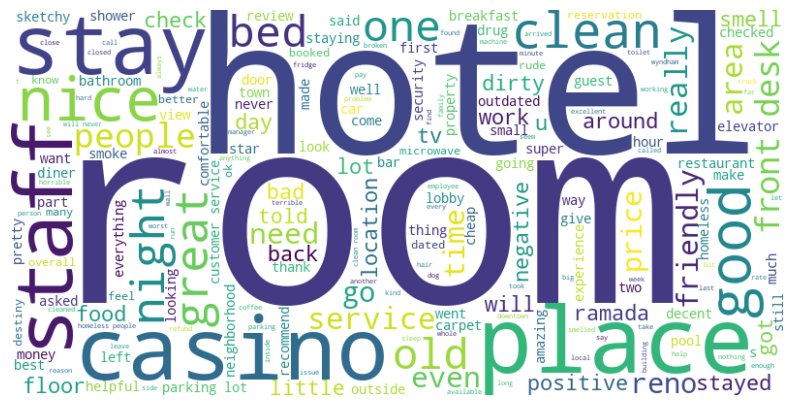

In [10]:
# Creamos un WordCloud con las palabras de la columna 'review' de todos los Hoteles Ramada en los estados en los que tiene presencia
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['extracted_emojis']))

# Mostrar el Word Cloud utilizando matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Realizamos análisis de sentimiento

In [11]:
#  Convertimos la columna 'date' a objetos datetime
def str_to_datetime(date_str):
    return datetime.strptime(date_str, '%m/%d/%Y %H:%M:%S')


df['sentiment_score'] = df['extracted_emojis'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['review_datetime_utc'] = df['review_datetime_utc'].apply(str_to_datetime)

# Agrupamos los datos por año y calculamos el promedio del sentimiento para cada grupo
promedio_sentimiento_por_año = df.groupby(df['review_datetime_utc'].dt.year)['sentiment_score'].mean()

In [12]:
promedio_sentimiento_por_año = pd.DataFrame(promedio_sentimiento_por_año)
promedio_sentimiento_por_año.reset_index(inplace=True)

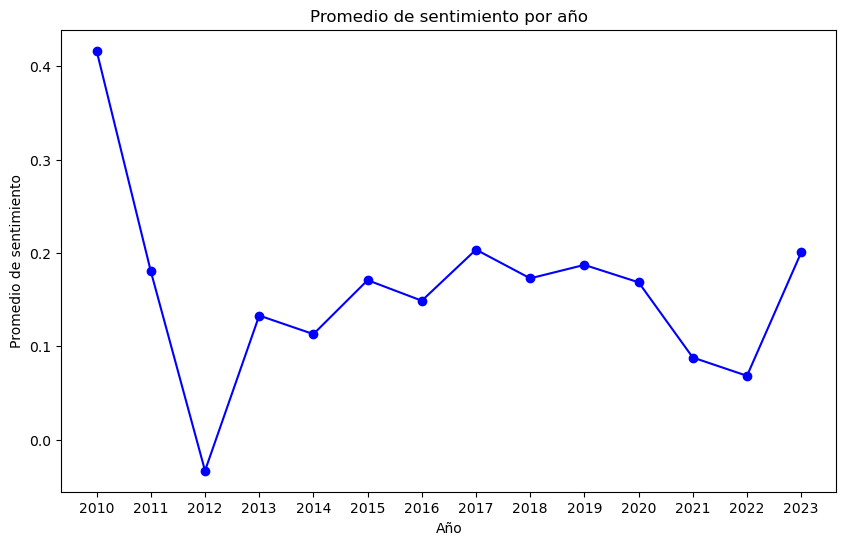

In [13]:
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(promedio_sentimiento_por_año['review_datetime_utc'], promedio_sentimiento_por_año['sentiment_score'], marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Promedio de sentimiento')
plt.title('Promedio de sentimiento por año')
plt.xticks(promedio_sentimiento_por_año['review_datetime_utc'])
plt.grid(False)
plt.show()

### Graficamos número de reviews por año

In [14]:
# Reviews por año
reviews_anio = df.groupby(df['review_datetime_utc'].dt.year)['extracted_emojis'].count().reset_index(name='review_count')
reviews_anio

,review_datetime_utc,review_count
0,2010,1
1,2011,1
2,2012,3
3,2013,5
4,2014,7
5,2015,7
6,2016,46
7,2017,98
8,2018,179
9,2019,118


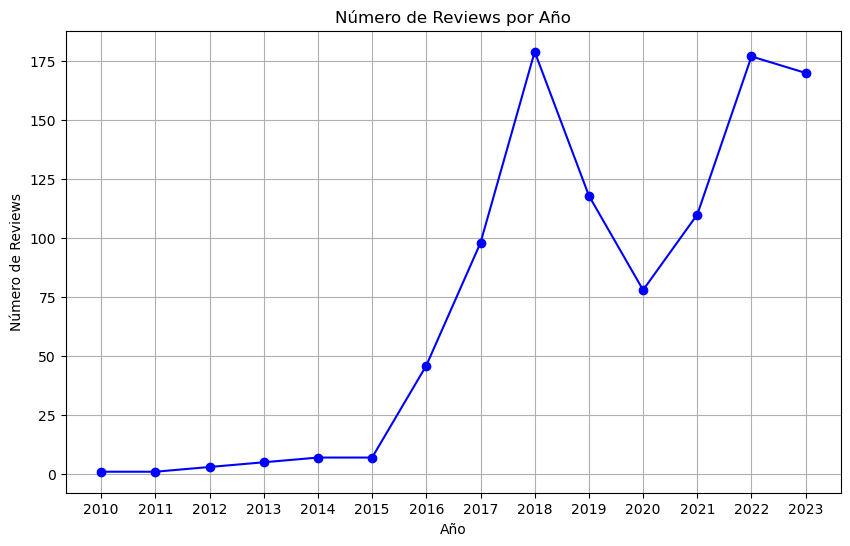

In [15]:
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(reviews_anio['review_datetime_utc'], reviews_anio['review_count'], marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Número de Reviews')
plt.title('Número de Reviews por Año')
plt.xticks(reviews_anio['review_datetime_utc'])
plt.grid(True)
plt.show()

### Graficamos número de reviews por mes

In [16]:
df_mes = df.copy()
# Obtener el nombre del mes y ordenarlos por el orden deseado
month_order = list(calendar.month_name)[1:]  # Lista de meses sin el primer elemento vacío
df_mes['month'] = df_mes['review_datetime_utc'].dt.month.map(lambda x: calendar.month_name[x])
df_mes['month'] = pd.Categorical(df_mes['month'], categories=month_order, ordered=True)

# Reviews por mes ordenados por el orden deseado
reviewsmes = df_mes.groupby('month')['extracted_emojis'].count().reset_index(name='review_count')
reviewsmes

,month,review_count
0,January,60
1,February,56
2,March,67
3,April,84
4,May,71
5,June,115
6,July,173
7,August,101
8,September,76
9,October,90


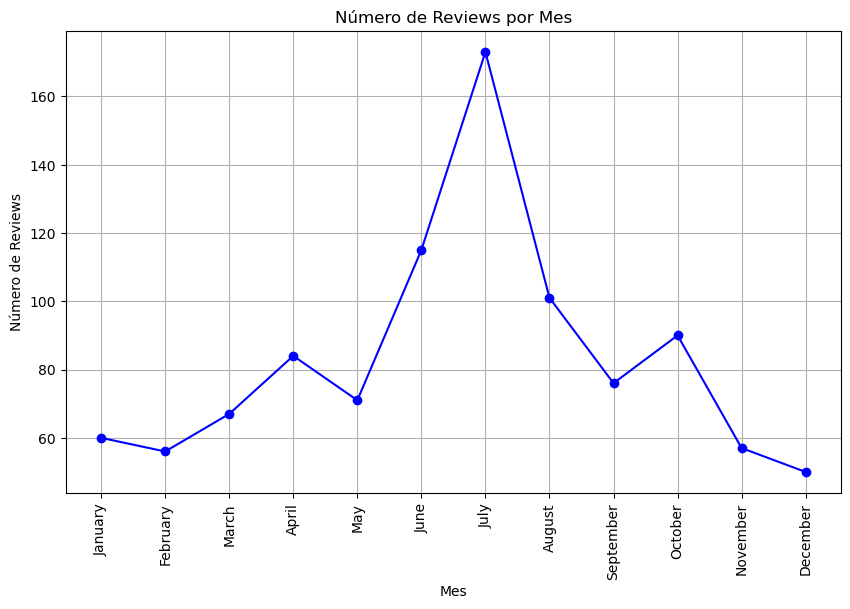

In [17]:
# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(reviewsmes['month'], reviewsmes['review_count'], marker='o', linestyle='-', color='b')
plt.xlabel('Mes')
plt.ylabel('Número de Reviews')
plt.title('Número de Reviews por Mes')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Graficamos un boxplot entre rating de review y sentimiento

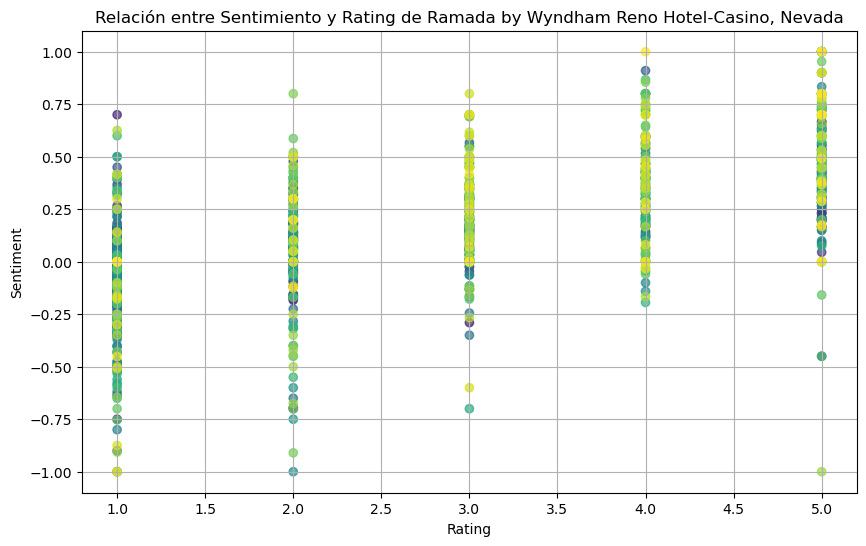

In [18]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
#sns.boxplot(x='review_rating', y='sentiment_score',data=df)
plt.scatter(df['review_rating'], df['sentiment_score'], c=range(1, len(df['review_rating']) + 1), cmap='viridis', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.title('Relación entre Sentimiento y Rating de Ramada by Wyndham Reno Hotel-Casino, Nevada')
plt.grid(True)
plt.show()